<a href="https://colab.research.google.com/github/shevtsovasofi/programming_sofi/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%225_nlp_libraries_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка
В этом воркбуке мы познакомимся с библиотеками для обработки естественного языка и отработаем цикл FOR.

**HuggingFace Datasets**

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

`pip install` - команда shell для загрузки библиотеки

`-q` - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

`!` - символ для объявления shell-команд

In [16]:
!pip install -q datasets

Загрузим датасет для анализа тональности текстов

In [17]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

Проведем анализ!

Структура объекта dataset довольно сложная, но удобная для интерпретации.

У нас есть 3 выборки: train, validation и test.

В каждой выборке 4 столбца:

- ID элемента датасета, он нужен, чтобы все значения были уникальными, как в реляционной БД
- text, label, sentiment

In [18]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

Обычно для обработки таких данных используется библиотека pandas, но пока мы учимся, будем использовать нативный метод - цикл FOR.

#**Задание 1**

Для начала проверим, сбалансирован ли наш датасет.

In [19]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [20]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
neg_train = neg_val = neg_test = 0 # счетчики
neut_train = neut_val = neut_test = 0
pos_train = pos_val = pos_test = 0
#обучающая выборка
for item in dataset['train']:
    sentiment = item['sentiment']
    if sentiment == "negative":
        neg_train += 1
    elif sentiment == 'positive':
        pos_train += 1
    elif sentiment == 'neutral':
        neut_train += 1

#валидационная выборка
for item in dataset.get('validation', []):
    sentiment = item['sentiment']
    if sentiment == "negative":
        neg_val += 1
    elif sentiment == 'positive':
        pos_val += 1
    elif sentiment == 'neutral':
        neut_val += 1

# тестовая выборка
for item in dataset.get('test', []):
    sentiment = item['sentiment']
    if sentiment == "negative":
        neg_test += 1
    elif sentiment == 'positive':
        pos_test += 1
    elif sentiment == 'neutral':
        neut_test += 1

print('\nДанные обучающей выборки:')
print('Положительные метки:', pos_train)
print('Отрицательные метки:', neg_train)
print('Нейтральные метки:', neut_train)
print('\nДанные валидационной выборки:')
print('Положительные метки:', pos_val)
print('Отрицательные метки:', neg_val)
print('Нейтральные метки:', neut_val)
print('\nДанные тестовой выборки:')
print('Положительные метки:', pos_test)
print('Отрицательные метки:', neg_test)
print('Нейтральные метки:', neut_test)



Данные обучающей выборки:
Положительные метки: 10478
Отрицательные метки: 9105
Нейтральные метки: 11649

Данные валидационной выборки:
Положительные метки: 1760
Отрицательные метки: 1517
Нейтральные метки: 1928

Данные тестовой выборки:
Положительные метки: 1730
Отрицательные метки: 1546
Нейтральные метки: 1930


In [21]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке
perc_pos_train = pos_train / (pos_train + neg_train + neut_train)
perc_neg_train = neg_train / (pos_train + neg_train + neut_train)
perc_neut_train = neut_train / (pos_train + neg_train + neut_train)

perc_pos_val = pos_val / (pos_val + neg_val + neut_val)
perc_neg_val = neg_val / (pos_val + neg_val + neut_val)
perc_neut_val = neut_val / (pos_val + neg_val + neut_val)

perc_pos_test = pos_test / (pos_test + neg_test + neut_test)
perc_neg_test = neg_test / (pos_test + neg_test + neut_test)
perc_neut_test = neut_test / (pos_test + neg_test + neut_test)

print(f'Положительные метки составляют {round(perc_pos_train * 100)} % обучающей выборки')
print(f'Негативные метки составляют {round(perc_neg_train * 100)} % обучающей выборки')
print(f'Нейтральные метки составляют {round(perc_neut_train * 100)} % обучающей выборки')

print(f'\nПоложительные метки составляют {round(perc_pos_val * 100)} % валидационной выборки')
print(f'Негативные метки составляют {round(perc_neg_val * 100)} % валидационной выборки')
print(f'Нейтральные метки составляют {round(perc_neut_val * 100)} % валидационной выборки')

print(f'\nПоложительные метки составляют {round(perc_pos_test * 100)} % тестовой выборки')
print(f'Негативные метки составляют {round(perc_neg_test * 100)} % тестовой выборки')
print(f'Нейтральные метки составляют {round(perc_neut_test * 100)} % тестовой выборки')



Положительные метки составляют 34 % обучающей выборки
Негативные метки составляют 29 % обучающей выборки
Нейтральные метки составляют 37 % обучающей выборки

Положительные метки составляют 34 % валидационной выборки
Негативные метки составляют 29 % валидационной выборки
Нейтральные метки составляют 37 % валидационной выборки

Положительные метки составляют 33 % тестовой выборки
Негативные метки составляют 30 % тестовой выборки
Нейтральные метки составляют 37 % тестовой выборки


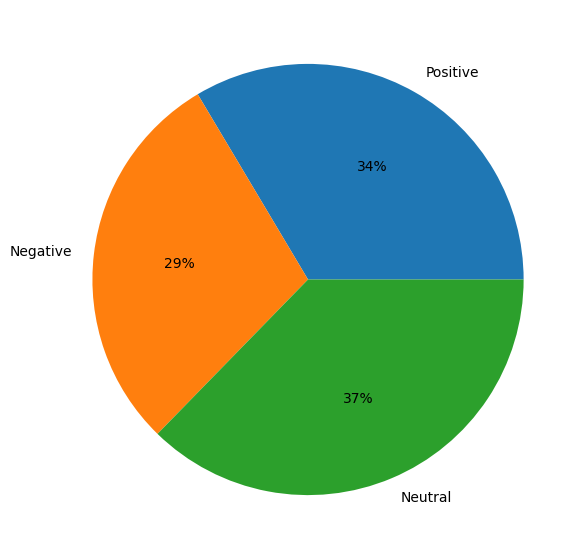

In [22]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
labels = ['Positive', 'Negative', 'Neutral']
data = [perc_pos_train, perc_neg_train, perc_neut_train]

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

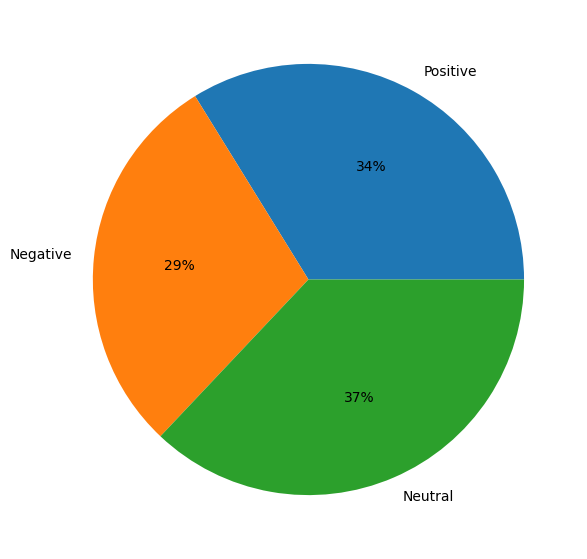

In [23]:
# Сделаем то же самое для проверочной выборки
labels = ['Positive', 'Negative', 'Neutral']
data = [perc_pos_val, perc_neg_val, perc_neut_val]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')

# Показать график
plt.show()

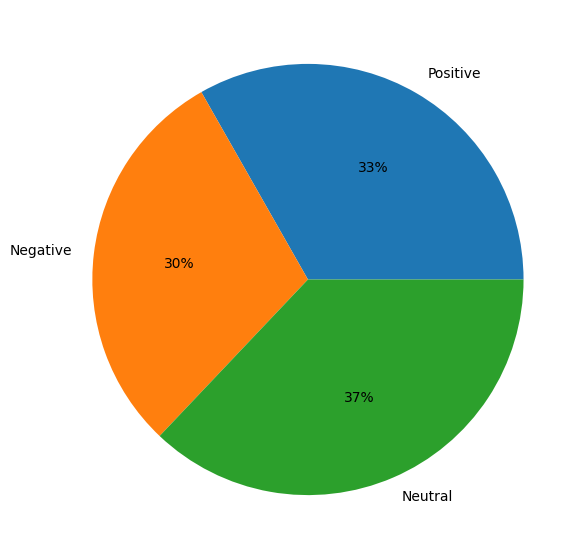

In [24]:
# Сделаем то же самое для тестовой выборки
labels = ['Positive', 'Negative', 'Neutral']
data = [perc_pos_test, perc_neg_test, perc_neut_test]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')

# Показать график
plt.show()

#**Задание 2**

Займемся обработкой естественного языка.

Познакомимся с библиотекой SpaCy для обработки текстов.

In [25]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Токенизация SpaCy производится с помощью цикла for

In [26]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [27]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [28]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [29]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [30]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [31]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

NN
NN
NNS
,
JJ


In [32]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

compound
compound
ROOT
punct
amod


In [33]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


Задание!

1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [34]:
### ваш код здесь ###
sample = dataset['test'][:5]['text']
print(sample)
# Выведите первые 5 текстов

['getting cds ready for tour', ' MC, happy mother`s day to your mom ;).. love yah', 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?', ' because you had chips and sale w/o me', 'Great for organising my work life balance']


2. Создадим список токенов для каждого текста с помощью SpaCy

In [35]:
tokens = [[token.text for token in nlp(text)] for text in sample] # Создаем список частей речи для каждого токена каждого текста
tokens
# Обработка может занять много времени, достаточно обработать первые 100 текстов

[['getting', 'cds', 'ready', 'for', 'tour'],
 [' ',
  'MC',
  ',',
  'happy',
  'mother`s',
  'day',
  'to',
  'your',
  'mom',
  ';)',
  '..',
  'love',
  'yah'],
 ['A',
  'year',
  'from',
  'now',
  'is',
  'graduation',
  '....',
  'i',
  'am',
  'pretty',
  'sure',
  'i`m',
  'not',
  'ready',
  'for',
  'it',
  '!',
  '?',
  '!',
  '?',
  '!',
  '?'],
 [' ', 'because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me'],
 ['Great', 'for', 'organising', 'my', 'work', 'life', 'balance']]

3. Частеречная разметка: создаем список частей речи для каждого токена

In [ ]:
pos = [[token.pos_ for token in nlp(text)] for text in sample]
pos

[['VERB', 'NOUN', 'ADJ', 'ADP', 'NOUN'],
 ['SPACE',
  'PROPN',
  'PUNCT',
  'ADJ',
  'PROPN',
  'NOUN',
  'ADP',
  'PRON',
  'NOUN',
  'PUNCT',
  'PUNCT',
  'NOUN',
  'NOUN'],
 ['DET',
  'NOUN',
  'ADP',
  'ADV',
  'AUX',
  'NOUN',
  'PUNCT',
  'PRON',
  'AUX',
  'ADV',
  'ADJ',
  'PROPN',
  'PART',
  'ADJ',
  'ADP',
  'PRON',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT'],
 ['SPACE', 'SCONJ', 'PRON', 'VERB', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON'],
 ['ADJ', 'ADP', 'VERB', 'PRON', 'NOUN', 'NOUN', 'NOUN'],
 ['SPACE',
  'PRON',
  'PRON',
  'VERB',
  'ADV',
  'NOUN',
  'SPACE',
  'PUNCT',
  'PROPN',
  'SPACE',
  'PRON',
  'AUX',
  'VERB',
  'PUNCT'],
 ['AUX',
  'PROPN',
  'PROPN',
  'PROPN',
  'NOUN',
  'PUNCT',
  'CCONJ',
  'AUX',
  'VERB',
  'PRON',
  'NOUN',
  'PUNCT',
  'INTJ',
  'PROPN',
  'VERB',
  'ADP',
  'ADJ',
  'NOUN',
  'NOUN'],
 ['SPACE',
  'VERB',
  'DET',
  'NOUN',
  'PRON',
  'VERB',
  'X',
  'VERB',
  'PRON',
  'PUNCT',
  'PUNCT',
  'X',
  'PUNCT',
  'N

4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [ ]:
# Это задание сложнее, чем кажется
# Подсказка:
# for i in range(len(list)) - это итерация по _длине_ списка;
for i in range(5):
    doc = nlp(sample[i])
    print('Текст', i)
    for token in doc:
        print(token.text, token.pos_)
# в переменную i сохраняется порядковый номер текущего элемента списка;
# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

Текст 0
getting VERB
cds NOUN
ready ADJ
for ADP
tour NOUN
Текст 1
  SPACE
MC PROPN
, PUNCT
happy ADJ
mother`s PROPN
day NOUN
to ADP
your PRON
mom NOUN
;) PUNCT
.. PUNCT
love NOUN
yah NOUN
Текст 2
A DET
year NOUN
from ADP
now ADV
is AUX
graduation NOUN
.... PUNCT
i PRON
am AUX
pretty ADV
sure ADJ
i`m PROPN
not PART
ready ADJ
for ADP
it PRON
! PUNCT
? PUNCT
! PUNCT
? PUNCT
! PUNCT
? PUNCT
Текст 3
  SPACE
because SCONJ
you PRON
had VERB
chips NOUN
and CCONJ
sale NOUN
w/o ADP
me PRON
Текст 4
Great ADJ
for ADP
organising VERB
my PRON
work NOUN
life NOUN
balance NOUN


5. Разметка именованных сущностей

Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.

In [ ]:
# Для каждого текста из выбранного среза: допишите этот код
  # Применим к тексту nlp: допишите этот код
sample = dataset['test'][7:19]['text']
for text in sample:
    doc = nlp(text)
    print([(ent.text, ent.label_) for ent in doc.ents]) # Вывод именованных сущностей и их лейблов


[('1st', 'ORDINAL'), ('2890', 'CARDINAL')]
[('first', 'ORDINAL')]
[('today', 'DATE'), ('i`m', 'NORP')]
[]
[('Audi', 'ORG')]
[]
[('REALLY', 'GPE')]
[('i`m', 'NORP')]
[]
[]
[('TY', 'ORG')]
[('recent years', 'DATE')]


Здесь мы используем новый тип данных - кортеж `(entity, label)`

Кортеж очень похож на список. Разница только в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.

Кортежи занимают меньше памяти, т.к. у них меньше свойств. Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря `dict`.

На практике, их удобно применять для разметки данных  методами NLP.

In [ ]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
sample = dataset['test'][7:23]['text']

for text in sample:
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)
